In [189]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from tqdm.auto import tqdm # progress bar

# Download FashionMNIST dataset
# datasets.FashionMNIST(root: Union[str, Path], 
#                      train: bool = True, 
#                      transform: Optional[Callable] = None, 
#                      target_transform: Optional[Callable] = None, 
#                      download: bool = False)
train_datasets = datasets.FashionMNIST(root = 'data',
                                 train = True,
                                 transform = ToTensor(),
                                 target_transform = None,
                                 download = True)

test_datasets = datasets.FashionMNIST(root = 'data',
                                      train = False,
                                      transform = ToTensor(),
                                      target_transform = None,
                                      download = True)

                                    

In [190]:
train_datasets

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [191]:
classes = train_datasets.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [192]:
train_datasets.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [193]:
image, label = train_datasets[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

Text(0.5, 1.0, 'Ankle boot')

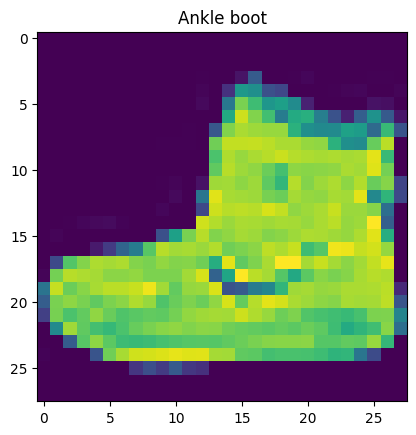

In [194]:
# print an image
plt.imshow(image.squeeze())
plt.title(classes[label])

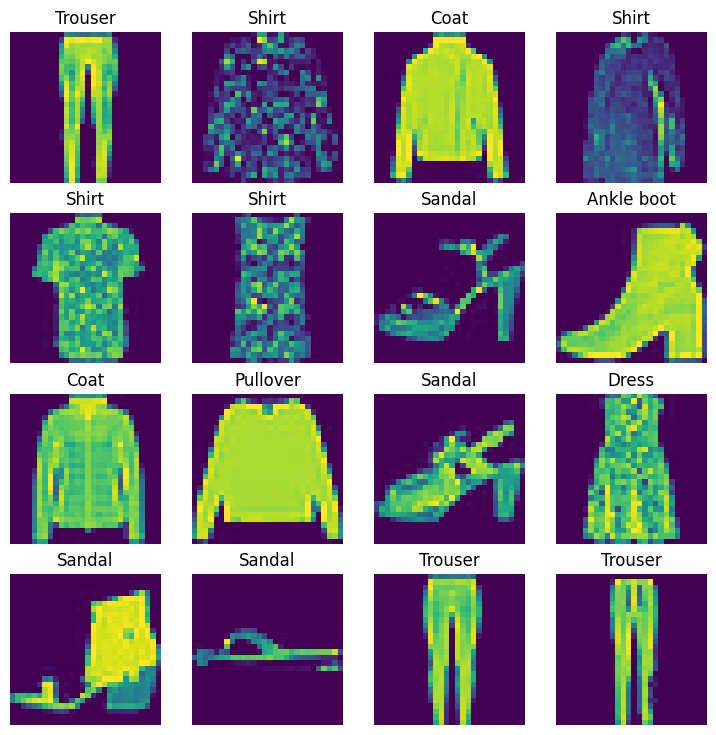

In [195]:
# Show multiple images
fig = plt.figure(figsize=(9,9))

rows = 4
cols = 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_datasets), [1]).item()
    fig.add_subplot(rows, cols, i)
    image, label = train_datasets[random_idx]
    plt.imshow(image.squeeze())
    plt.title(train_datasets.classes[label])
    plt.axis(False)

In [196]:
# prepare data for training
BATCH_SIZE = 32 # we will train our data 32 images at a time, we will update the network every 32 images instead of all the 60000 images in dataset

# this makes training_dataloader a iterable 
training_dataloader = DataLoader(train_datasets, 
                                 batch_size = BATCH_SIZE, 
                                 shuffle=True)

testing_dataloader = DataLoader(test_datasets,
                                batch_size = BATCH_SIZE,
                                shuffle = False)

In [197]:
print(f"Traning DataLoader has {len(training_dataloader)} of batchs of {BATCH_SIZE}")
print(f"Testing DataLoader has {len(testing_dataloader)} of batchs of {BATCH_SIZE}")

Traning DataLoader has 1875 of batchs of 32
Testing DataLoader has 313 of batchs of 32


In [198]:
# add non linear to this version and see the differences
class FashionMNIST_modelV1(nn.Module):
    def __init__(self, input_layer, output_layer, hidden_layer = 10):
        super().__init__()
        self.seq_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_layer,
                      out_features = hidden_layer),
            nn.ReLU(),
            nn.Linear(in_features= hidden_layer,
                      out_features = output_layer),
            nn.ReLU()  
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq_layer(x)

In [199]:
model_v1 = FashionMNIST_modelV1(input_layer = 784, output_layer = 10)
model_v1

FashionMNIST_modelV1(
  (seq_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [200]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_v1.parameters(), lr=0.1)

In [201]:
def acc(y_pred, y_val):
    true_val = torch.eq(y_pred, y_val).sum().item()
    return 100*true_val/len(y_val)

In [202]:

# training
# train per mini-batch meaning since my batch size is 32, run through all 32 images and traint eh network and evaluate, do that per batch 

epochs = 10

for epoch in tqdm(range(epochs)):
    training_loss = 0
    training_acc = 0
    
    for batch, (X_train, y_train) in enumerate(training_dataloader):
        # set model to training mode 
        model_v1.train()
        # do the forward pass
        y_pred = model_v1(X_train)
        # caculate the loss
        loss = loss_fn(y_pred, y_train)
        training_loss += loss
        training_acc += acc(y_pred.argmax(dim=1), y_train)
        
        # set zero gradient so it doesnt accumulate
        optimizer.zero_grad()
        # calculate the gradient
        loss.backward()
        # do back propagation (update weights)
        optimizer.step()
    training_loss /= len(training_dataloader)
    training_acc /= len(training_dataloader)

    
    # Testing
    testing_loss = 0
    testing_acc = 0
    model_v1.eval()
    with torch.inference_mode():
        for X_test, y_test in testing_dataloader:
            # do forward pass
            test_y_pred = model_v1(X_test)
            # calculate the loss
            testing_loss += loss_fn(test_y_pred, y_test)
            
            testing_acc += acc(test_y_pred.argmax(dim=1), y_test)
            
        testing_loss /= len(testing_dataloader)
        testing_acc /= len(testing_dataloader)
    
    print(f"Train Loss: {training_loss:.5f},Train Acc: {training_acc:.2f}% Test Loss: {testing_loss:.5f}, Test Acc: {testing_acc:.2f}%")
            
        

  0%|          | 0/10 [00:00<?, ?it/s]

Train Loss: 1.52933,Train Acc: 46.09% Test Loss: 1.45719, Test Acc: 48.31%
Train Loss: 1.42522,Train Acc: 49.13% Test Loss: 1.42296, Test Acc: 48.97%
Train Loss: 1.33621,Train Acc: 52.61% Test Loss: 1.16512, Test Acc: 58.40%
Train Loss: 0.88141,Train Acc: 69.73% Test Loss: 0.76744, Test Acc: 72.84%
Train Loss: 0.67510,Train Acc: 75.46% Test Loss: 0.68707, Test Acc: 74.70%
Train Loss: 0.65240,Train Acc: 76.14% Test Loss: 0.70057, Test Acc: 73.86%
Train Loss: 0.64191,Train Acc: 76.52% Test Loss: 0.71568, Test Acc: 74.28%
Train Loss: 0.63550,Train Acc: 76.55% Test Loss: 0.70761, Test Acc: 74.59%
Train Loss: 0.62770,Train Acc: 76.75% Test Loss: 0.66305, Test Acc: 75.84%
Train Loss: 0.62383,Train Acc: 76.76% Test Loss: 0.66482, Test Acc: 75.14%
